### Understanding Data

In [1]:
# Import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
from pandas import DataFrame, Series
import matplotlib.pyplot as plt # data visualization
import datetime as dt # date time

In [2]:
# read_excel function to read the required Excel file
orders_df = pd.read_excel('orders_management.xlsx', sheet_name = 'Orders')

In [3]:
# preview first 5 rows with all columns
orders_df.head()

,Order ID,Order Priority,Order Date,Ship Date,Item Type,Units Sold,Price,Cost,Sales Channel,Country
0,506209075,H,2010-01-01,2010-02-04,Vegetables,7369,154.06,90.93,Online,Central African Republic
1,863776719,C,2010-01-01,2010-02-10,Cereal,9581,205.70,117.11,Online,China
2,695167052,C,2010-01-02,2010-01-22,Cosmetics,4234,437.20,263.33,Offline,Mongolia
3,335552775,M,2010-01-02,2010-02-12,Snacks,6378,152.58,97.44,Offline,Equatorial Guinea
4,907228076,H,2010-01-02,2010-02-21,Clothes,7803,109.28,35.84,Online,Sweden


In [4]:
# show basic information of data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        10000 non-null  int64         
 1   Order Priority  10000 non-null  object        
 2   Order Date      10000 non-null  datetime64[ns]
 3   Ship Date       10000 non-null  datetime64[ns]
 4   Item Type       10000 non-null  object        
 5   Units Sold      10000 non-null  int64         
 6   Price           10000 non-null  float64       
 7   Cost            10000 non-null  float64       
 8   Sales Channel   10000 non-null  object        
 9   Country         10000 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 781.4+ KB


In [5]:
orders_df[orders_df.duplicated()]

,Order ID,Order Priority,Order Date,Ship Date,Item Type,Units Sold,Price,Cost,Sales Channel,Country


In [6]:
orders_df.shape

(10000, 10)

From the above observation, noted that
1. There is no typo, Null or missing values.
2. Data frame has 10000 rows and 10 columns.
3. There is no duplicated value

The following data manipulation is performed:
1. Create new column *Delivery Time* by minusing *Ship Date* from *Order Date*
2. Create new column *Revenue* from *Units Sold* and *Price*
3. Recalculate the *Cost* column to total cost per order instead of per unit sold by multiplying itself by *Units Sold*
4. Create new column *Profit* by misusing *Revenue* from *Cost*
5. Create new column *Region* by getting Region corresponding *Country* from Sheet *Regions* in Data file

In [7]:
new_cols = ['Order ID', 'Order Priority', 'Order Date', 'Ship Date', 'Delivery Time', 'Item Type', 
            'Units Sold', 'Price', 'Revenue', 'Cost', 'Profit', 'Sales Channel', 'Country', 'Region']

orders_df = orders_df.reindex(columns= new_cols)
orders_df.head()

,Order ID,Order Priority,Order Date,Ship Date,Delivery Time,Item Type,Units Sold,Price,Revenue,Cost,Profit,Sales Channel,Country,Region
0,506209075,H,2010-01-01,2010-02-04,NaN,Vegetables,7369,154.06,NaN,90.93,NaN,Online,Central African Republic,NaN
1,863776719,C,2010-01-01,2010-02-10,NaN,Cereal,9581,205.70,NaN,117.11,NaN,Online,China,NaN
2,695167052,C,2010-01-02,2010-01-22,NaN,Cosmetics,4234,437.20,NaN,263.33,NaN,Offline,Mongolia,NaN
3,335552775,M,2010-01-02,2010-02-12,NaN,Snacks,6378,152.58,NaN,97.44,NaN,Offline,Equatorial Guinea,NaN
4,907228076,H,2010-01-02,2010-02-21,NaN,Clothes,7803,109.28,NaN,35.84,NaN,Online,Sweden,NaN


In [8]:
delivery_time = orders_df["Ship Date"] - orders_df["Order Date"]
delivery_time = delivery_time.dt.days
orders_df["Delivery Time"] = delivery_time
orders_df.head()

,Order ID,Order Priority,Order Date,Ship Date,Delivery Time,Item Type,Units Sold,Price,Revenue,Cost,Profit,Sales Channel,Country,Region
0,506209075,H,2010-01-01,2010-02-04,34,Vegetables,7369,154.06,NaN,90.93,NaN,Online,Central African Republic,NaN
1,863776719,C,2010-01-01,2010-02-10,40,Cereal,9581,205.70,NaN,117.11,NaN,Online,China,NaN
2,695167052,C,2010-01-02,2010-01-22,20,Cosmetics,4234,437.20,NaN,263.33,NaN,Offline,Mongolia,NaN
3,335552775,M,2010-01-02,2010-02-12,41,Snacks,6378,152.58,NaN,97.44,NaN,Offline,Equatorial Guinea,NaN
4,907228076,H,2010-01-02,2010-02-21,50,Clothes,7803,109.28,NaN,35.84,NaN,Online,Sweden,NaN


In [9]:
orders_df['Revenue'] = orders_df['Units Sold']*orders_df['Price']
orders_df['Cost'] *= orders_df['Units Sold']
orders_df['Profit'] = orders_df['Revenue'] - orders_df['Cost']
orders_df.head()

,Order ID,Order Priority,Order Date,Ship Date,Delivery Time,Item Type,Units Sold,Price,Revenue,Cost,Profit,Sales Channel,Country,Region
0,506209075,H,2010-01-01,2010-02-04,34,Vegetables,7369,154.06,1135268.14,670063.17,465204.97,Online,Central African Republic,NaN
1,863776719,C,2010-01-01,2010-02-10,40,Cereal,9581,205.70,1970811.70,1122030.91,848780.79,Online,China,NaN
2,695167052,C,2010-01-02,2010-01-22,20,Cosmetics,4234,437.20,1851104.80,1114939.22,736165.58,Offline,Mongolia,NaN
3,335552775,M,2010-01-02,2010-02-12,41,Snacks,6378,152.58,973155.24,621472.32,351682.92,Offline,Equatorial Guinea,NaN
4,907228076,H,2010-01-02,2010-02-21,50,Clothes,7803,109.28,852711.84,279659.52,573052.32,Online,Sweden,NaN


In [10]:
region_df = pd.read_excel('orders_management.xlsx', sheet_name = 'Regions')

region_countries_dict = {}

for _, row in region_df.iterrows():
    country_list = row['Countries'].strip().split(";")
    for country in country_list:
        region_countries_dict[country.strip()] = row['Region'].strip()


In [11]:
def get_region(country_name: str, region_countries_dict: dict) -> str:
    """
    This function recieve a country and the region dict
    and return the corresponding region of this country
    """
    if country_name.strip() in region_countries_dict:
        return region_countries_dict[country_name.strip()]
    else:
        print(country_name)
    return None
        
orders_df.head()

,Order ID,Order Priority,Order Date,Ship Date,Delivery Time,Item Type,Units Sold,Price,Revenue,Cost,Profit,Sales Channel,Country,Region
0,506209075,H,2010-01-01,2010-02-04,34,Vegetables,7369,154.06,1135268.14,670063.17,465204.97,Online,Central African Republic,NaN
1,863776719,C,2010-01-01,2010-02-10,40,Cereal,9581,205.70,1970811.70,1122030.91,848780.79,Online,China,NaN
2,695167052,C,2010-01-02,2010-01-22,20,Cosmetics,4234,437.20,1851104.80,1114939.22,736165.58,Offline,Mongolia,NaN
3,335552775,M,2010-01-02,2010-02-12,41,Snacks,6378,152.58,973155.24,621472.32,351682.92,Offline,Equatorial Guinea,NaN
4,907228076,H,2010-01-02,2010-02-21,50,Clothes,7803,109.28,852711.84,279659.52,573052.32,Online,Sweden,NaN


### Question 1
Item type that gains max profit is in which countries?

In [12]:
country_item_df = orders_df.reindex(columns=['Country', 'Item Type', 'Profit'])

country_item_df = country_item_df.groupby(['Country', 'Item Type']).sum()

country_item_df['Profit Max By Country'] = country_item_df.groupby('Country')['Profit'].transform(max)
country_item_df.head(20)

filter_ = country_item_df['Profit'] ==  country_item_df['Profit Max By Country']
country_item_df[filter_].reindex(columns=['Profit'])


,,Profit
Country,Item Type,
Afghanistan,Household,5339986.33
Albania,Household,3928629.65
Algeria,Cosmetics,5304078.22
Andorra,Office Supplies,3761618.75
Angola,Cosmetics,3905989.55
...,...,...
Vatican City,Household,3002033.22
Vietnam,Household,4416041.58
Yemen,Household,5152711.43


### Question 2
Total cost, revenue and profit by location and item type?

In [13]:
orders_df['Region'] = orders_df.apply(lambda x: get_region(x['Country'], region_countries_dict), axis= 1)
orders_df.head()

,Order ID,Order Priority,Order Date,Ship Date,Delivery Time,Item Type,Units Sold,Price,Revenue,Cost,Profit,Sales Channel,Country,Region
0,506209075,H,2010-01-01,2010-02-04,34,Vegetables,7369,154.06,1135268.14,670063.17,465204.97,Online,Central African Republic,Sub-Saharan Africa
1,863776719,C,2010-01-01,2010-02-10,40,Cereal,9581,205.70,1970811.70,1122030.91,848780.79,Online,China,Asia
2,695167052,C,2010-01-02,2010-01-22,20,Cosmetics,4234,437.20,1851104.80,1114939.22,736165.58,Offline,Mongolia,Asia
3,335552775,M,2010-01-02,2010-02-12,41,Snacks,6378,152.58,973155.24,621472.32,351682.92,Offline,Equatorial Guinea,Sub-Saharan Africa
4,907228076,H,2010-01-02,2010-02-21,50,Clothes,7803,109.28,852711.84,279659.52,573052.32,Online,Sweden,Europe


In [14]:
total_df = orders_df.reindex(columns=['Region', 'Country', 'Item Type', 'Cost', 'Revenue', 'Profit'])
total_df.sort_values(by=['Region', 'Country', 'Item Type'])
#Total

,Region,Country,Item Type,Cost,Revenue,Profit
946,Asia,Bangladesh,Baby Food,1009606.86,1616688.24,607081.38
8021,Asia,Bangladesh,Baby Food,15782.58,25272.72,9490.14
9521,Asia,Bangladesh,Beverages,67140.48,100214.40,33073.92
9561,Asia,Bangladesh,Beverages,58716.13,87640.15,28924.02
594,Asia,Bangladesh,Cereal,1143930.48,2009277.60,865347.12
...,...,...,...,...,...,...
1129,Sub-Saharan Africa,Zimbabwe,Vegetables,332894.73,564013.66,231118.93
3913,Sub-Saharan Africa,Zimbabwe,Vegetables,848104.11,1436917.62,588813.51
6846,Sub-Saharan Africa,Zimbabwe,Vegetables,329075.67,557543.14,228467.47
7725,Sub-Saharan Africa,Zimbabwe,Vegetables,711254.46,1205057.32,493802.86


In [15]:
total_df.groupby(['Region', 'Country', 'Item Type']).sum()

Cost      Revenue  \
Region             Country    Item Type                                  
Asia               Bangladesh Baby Food        1025389.44   1641960.96   
                              Beverages         125856.61    187854.55   
                              Cereal           7943219.97  13952013.90   
                              Clothes           566021.12   1725859.04   
                              Cosmetics        6853163.25  11378130.00   
...                                                   ...          ...   
Sub-Saharan Africa Zimbabwe   Meat             3515611.60   4067019.60   
                              Office Supplies  9158977.12  11361660.87   
                              Personal Care    1047148.26   1510206.94   
                              Snacks           1589636.16   2489190.12   
                              Vegetables       3086618.85   5229566.70   

                                                   Profit  
Region             Country    Item Type                    
Asia               Bangladesh Baby Food         616571.52  
                              Beverages          61997.94  
                              Cereal           6008793.93  
                              Clothes          1159837.92  
                              Cosmetics        4524966.75  
...                                                   ...  
Sub-Saharan Africa Zimbabwe   Meat              551408.00  
                              Office Supplies  2202683.75  
                              Personal Care     463058.68  
                              Snacks            899553.96  
                              Vegetables       2142947.85  

[2198 rows x 3 columns]

## Question 3
How many orders of Beverages are there in 2011?

In [16]:
import datetime

# orders_df['Order Date'] =  pd.to_datetime(orders_df['Order Date'], format='%Y/%m/%d')
# Beverages_df = orders_df[(orders_df['Item Type'] == 'Beverages') & (datetime.date(2011,1,1) <= orders_df['Order Date'] & orders_df['Order Date'] <= datetime.date(2011,12,31))]
# Beverages_df

Beverages_df = orders_df
# convert date column into date format
Beverages_df['Order Date'] = pd.to_datetime(Beverages_df['Order Date'])

# filter rows on the basis of date
filter_ = (Beverages_df['Order Date'] > '01-01-2011') & (Beverages_df['Order Date'] <= '31-12-2011')

Beverages_df = Beverages_df.loc[filter_]
Beverages_df

,Order ID,Order Priority,Order Date,Ship Date,Delivery Time,Item Type,Units Sold,Price,Revenue,Cost,Profit,Sales Channel,Country,Region
1236,123055732,H,2011-01-02,2011-01-03,1,Vegetables,3780,154.06,582346.80,343715.40,238631.40,Offline,New Zealand,Australia and Oceania
1237,330905473,L,2011-01-02,2011-01-09,7,Fruits,1138,9.33,10617.54,7874.96,2742.58,Online,Costa Rica,Central America and the Caribbean
1238,131360280,H,2011-01-02,2011-01-26,24,Cosmetics,1281,437.20,560053.20,337325.73,222727.47,Offline,Malawi,Sub-Saharan Africa
1239,486763274,L,2011-01-02,2011-02-02,31,Beverages,2925,47.45,138791.25,92985.75,45805.50,Offline,France,Europe
1240,445122516,C,2011-01-02,2011-02-16,45,Cereal,499,205.70,102644.30,58437.89,44206.41,Offline,Hungary,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,382933461,C,2011-12-29,2012-01-29,31,Cosmetics,7376,437.20,3224787.20,1942322.08,1282465.12,Online,Singapore,Asia
2573,908992755,H,2011-12-29,2012-01-29,31,Office Supplies,11,651.21,7163.31,5774.56,1388.75,Offline,Haiti,Central America and the Caribbean
2574,590783202,M,2011-12-29,2012-02-04,37,Cosmetics,4733,437.20,2069267.60,1246340.89,822926.71,Offline,Democratic Republic of the Congo,Sub-Saharan Africa
2575,117069900,M,2011-12-29,2012-02-12,45,Vegetables,2440,154.06,375906.40,221869.20,154037.20,Offline,Finland,Europe


In [17]:
num_orders_in_2011 = len(Beverages_df['Order ID'].unique())
print("There is " + str(num_orders_in_2011) + " orders in of Beverages in 2011")

There is 1341 orders in of Beverages in 2011


# Question 4
Which region has longest average delivery time in 2016?

In [18]:
order_2016_df = orders_df
# convert date column into date format
order_2016_df['Order Date'] = pd.to_datetime(order_2016_df['Order Date'])

# filter rows on the basis of date
filter_ = (order_2016_df['Order Date'] > '01-01-2016') & (order_2016_df['Order Date'] <= '31-12-2016')

order_2016_df = order_2016_df.loc[filter_]

order_2016_df.groupby(['Region']).mean().sort_values('Delivery Time', ascending=False)


,Order ID,Delivery Time,Units Sold,Price,Revenue,Cost,Profit
Region,,,,,,,
North America,5.391428e+08,27.857143,4614.535714,214.482857,1.171380e+06,8.214993e+05,349880.717143
Central America and the Caribbean,5.799106e+08,25.909722,4782.055556,272.661806,1.223240e+06,8.704689e+05,352771.450903
Australia and Oceania,5.232332e+08,25.846154,4760.854701,257.858803,1.167968e+06,7.934394e+05,374528.212821
Sub-Saharan Africa,5.619960e+08,25.368750,5082.168750,271.953281,1.327658e+06,9.325189e+05,395139.395250
Europe,5.431711e+08,24.150273,4859.341530,255.130902,1.198777e+06,8.276454e+05,371131.516175
Asia,5.472291e+08,23.972826,4863.168478,282.253913,1.401328e+06,1.007601e+06,393727.104674
Middle East and North Africa,5.547438e+08,23.560976,5311.018293,288.038293,1.461632e+06,1.047555e+06,414076.879634


So, North America has longest average delivery time in 2016

## Question 5
Which item type contributes most profit in Jan?

In [19]:

jan_df = orders_df
filter = jan_df['Ship Date'].dt.month == 1 
jan_df = jan_df[filter].reindex(columns = ['Item Type', 'Profit'])
jan_df = jan_df.groupby('Item Type').sum().sort_values('Profit', ascending=False)
jan_df

,Profit
Item Type,
Cosmetics,51190457.66
Household,48813119.82
Cereal,40012913.76
Office Supplies,35448601.25
Baby Food,34582645.32
Clothes,27929378.88
Vegetables,22095058.09
Snacks,20476239.00
Meat,17115040.80


### Question 6
Total profit of top 5 countries by orders from Online channel?

In [20]:
top_5_online = orders_df
filter = top_5_online['Sales Channel'] == 'Online'
top_5_online = top_5_online[filter].reindex(columns=['Country', 'Profit'])
top_5_online.groupby('Country').sum().sort_values('Profit', ascending=False).head(5)

,Profit
Country,
Taiwan,18499667.18
Bangladesh,18140680.63
Lithuania,17353916.46
Botswana,17193359.09
India,16900654.89


### Question 7 - 8 - 9
Evaluate business situation  
Illustrate insights by chart

<AxesSubplot:title={'center':'Quarterly business situation'}, xlabel='Quarter'>

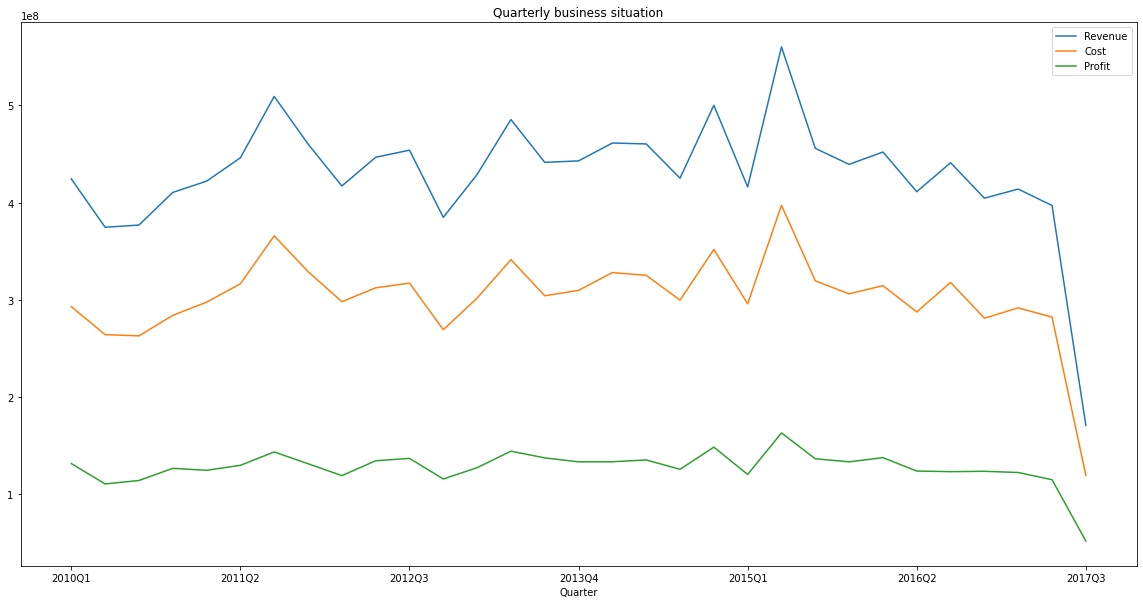

In [21]:
evaluate_df = orders_df

# Calculate metrics by quarter
evaluate_df = evaluate_df.reindex(columns=['Order Date', 'Delivery Time', 'Units Sold', 'Price', 'Revenue', 'Cost', 'Profit', 'Country', 'Region', 'Sales Channel', 'Order ID'])

# convert to string because: https://github.com/plotly/plotly.py/issues/2764#issuecomment-690614839
evaluate_df["Quarter"] = evaluate_df['Order Date']
evaluate_df["Quarter"] = evaluate_df["Quarter"].dt.to_period('Q').astype(str)
evaluate_df['Num Order'] = 1

finance_df = evaluate_df
finance_df = finance_df[['Revenue', 'Cost', 'Profit', 'Quarter']].groupby('Quarter').sum()
finance_df
finance_df.plot(kind='line', figsize= (20, 10), title= "Quarterly business situation")

In [22]:
# find last day in quarter 3 2017
evaluate_df.sort_values('Order Date', ascending=False).head(1)

,Order Date,Delivery Time,Units Sold,Price,Revenue,Cost,Profit,Country,Region,Sales Channel,Order ID,Quarter,Num Order
9999,2017-07-28,40,8861,152.58,1352011.38,863415.84,488595.54,Ghana,Sub-Saharan Africa,Offline,861848104,2017Q3,1


- Because the data stops at 28-07-2017, indicators in the third quarter of 2017 are not completely collected yet. This is why the values at the time of Q3 2017 plummeted.
- The business situation from 2010 to 2017 growth, but there's a lot of variation. It strongly increases in the second quarter of year and mild reliefs after that.
- 

<AxesSubplot:title={'center':'Delivery Time Average'}, xlabel='Quarter'>

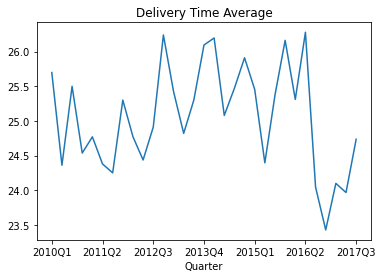

In [23]:
delivery_df = evaluate_df.reindex(columns=['Delivery Time', 'Num Order', 'Quarter'])
delivery_df = delivery_df.groupby('Quarter').sum()

delivery_df['Delivery Time Average'] = delivery_df['Delivery Time'] / delivery_df['Num Order']
delivery_df['Delivery Time Average'].plot(kind='line', title= "Delivery Time Average")

- Delivery Time Average is improved over time but it's still high compared to the common ground. Because the Delivery Time can dependent on region, sales chanel, item and unit of sold, we can 

<AxesSubplot:xlabel='Quarter'>

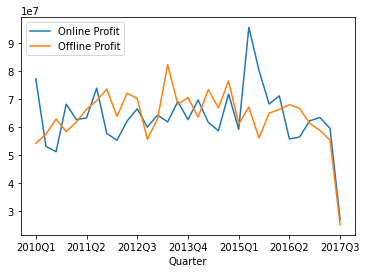

In [24]:
channel_df = evaluate_df
channel_df.columns

filter_online = channel_df['Sales Channel'] == 'Online'
filter_offline = channel_df['Sales Channel'] == 'Offline'

channel_df['Online Profit'] = channel_df.loc[filter_online]['Profit']
channel_df['Offline Profit'] = channel_df.loc[filter_offline]['Profit']

channel_df.fillna(0)

channel_df = channel_df.groupby('Quarter').sum()
channel_df.reindex(columns=['Online Profit', 'Offline Profit']).plot(kind='line')

- Profit ratio between 2 sales channels is quite equal. Online channel profits accounted for a high proportion in the second quarters, while offline channel profit take a high percentage in the last quarters.

In [25]:
orders_df.describe()

,Order ID,Delivery Time,Units Sold,Price,Revenue,Cost,Profit
count,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,25.06020,5002.855900,268.143139,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,14.64797,2873.246454,217.944092,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,0.00000,2.000000,9.330000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,12.00000,2530.750000,109.280000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,25.00000,4962.000000,205.700000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,37.00000,7472.000000,437.200000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,50.00000,10000.000000,668.270000,6.680027e+06,5.241726e+06,1.738178e+06


- From 01-01-2010 to 28-07-2017, Kastria have 10000 completed orders with Delivery Time Average is **25.06 days** for each order, Profit Percentage for a order is **42.11%**. 